In [84]:
import glob,os
import pandas as pd
import numpy as np
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import warnings
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.dates as mdates
from datetime import datetime, timedelta

warnings.filterwarnings("ignore")

In [127]:
oripath = '../Results/soundsepration/'
dp = pd.read_csv('../Results/soundsepration/experiment_period.txt')

In [246]:
def figure_base_setting(ax):
    ax[0].set_xlim(ax[0].get_xlim()[0]-10 ,ax[0].get_xlim()[1]+10)
    ax[1].set_xlim(ax[1].get_xlim()[0]-10 ,ax[1].get_xlim()[1]+10)
    ax[2].set_xlim(ax[2].get_xlim()[0]-10 ,ax[2].get_xlim()[1]+10)

    ax[0].grid(axis='y', color='lightgrey')
    ax[1].grid(axis='y', color='lightgrey')
    ax[2].grid(axis='y', color='lightgrey')

    ax[0].yaxis.set_minor_locator(MultipleLocator(0.25))
    ax[0].yaxis.set_major_locator(MultipleLocator(0.5))
    
    ax[0].yaxis.set_ticks_position('both')
    ax[1].yaxis.set_ticks_position('both')
    ax[2].yaxis.set_ticks_position('both')

    ax[0].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax[1].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax[2].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    
    ax[1].xaxis.set_major_formatter(mdates.DateFormatter("%b/%d"))
    ax[0].xaxis.set_major_formatter(mdates.DateFormatter("%b/%d"))
    ax[2].xaxis.set_major_formatter(mdates.DateFormatter("%b/%d"))


../Results/soundsepration/Keelung-5min/20231206_162010_2021_3stage_separation/stats.log
../Results/soundsepration/Keelung-5min/20231205_145027_2023_3stage_separation/stats.log
../Results/soundsepration/Taoyuan-5min/20231204_101821_2023_3stage_separation/stats.log
../Results/soundsepration/Taoyuan-5min/20231206_161629_2021_3stage_separation/stats.log
../Results/soundsepration/Taoyuan-5min/20231206_161522_2022_3stage_separation/stats.log


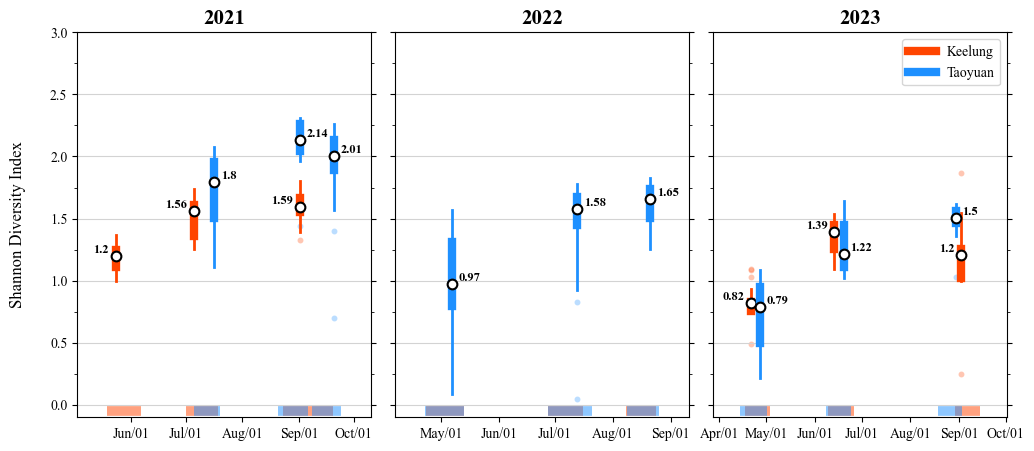

In [247]:
plt.rcParams["font.family"] = "Times New Roman"
fig, ax = plt.subplots(1,3,figsize=(12,5), sharey=True)
plt.subplots_adjust(wspace = 0.08) 

            
for idx in range(1, 4):
    dp_ = dp[dp['region']=='Keelung'][dp['year']==int('2022')][dp['index']==idx]
    begin = dp_['begin'].values[0]; end = dp_['end'].values[0]
    begintime = datetime.strptime(begin, "%Y-%m-%dT%H:%M:%S")
    endtime = datetime.strptime(end, "%Y-%m-%dT%H:%M:%S") 
    ax[1].hlines(xmin=begintime, xmax=endtime, y=-0.05, lw=7, color='orangered', alpha=0.5)   
    
for path in glob.glob(f'{oripath}/*-5min/*202?_3stage_separation/*log'):
    
    color = 'orangered' if 'Keelung' in path else 'dodgerblue'
    region = 'Keelung' if 'Keelung' in path else 'Taoyuan'
    dx = -0.15 if 'Keelung' in path else 0.15
    print(path)
    cmd = ''' awk -F, 'NR>1 {print $0}' %(path)s
    '''%locals()
    response = os.popen(cmd).read()
    res_year = response.rsplit('\n')

    year = path.rsplit('_')[2]
    if int(year) == 2021:
        pidx = 0 
    elif int(year) == 2022:
        pidx = 1
    elif int(year) == 2023:
        pidx = 2  
    ax[pidx].set_title(year, fontsize=15, fontweight='bold')
    
    
    for info in res_year[:3]:
        stats = info.split(',',7)
        idx  = int(stats[1])
        Q1   = float(stats[2])
        Q2   = float(stats[3])
        Q3   = float(stats[4])
        minn = float(stats[5])
        maxx = float(stats[6])
        drop = stats[7]
        
        dp_ = dp[dp['region']==region][dp['year']==int(year)][dp['index']==idx]
        begin = dp_['begin'].values[0]; end = dp_['end'].values[0]
        begintime = datetime.strptime(begin, "%Y-%m-%dT%H:%M:%S")
        endtime = datetime.strptime(end, "%Y-%m-%dT%H:%M:%S")
        dt = endtime - begintime
        ddt = -4 if region == 'Keelung' else 4
        plottime = begintime + timedelta(days=dt.days/2+ddt)      
        
        ax[pidx].hlines(xmin=begintime, xmax=endtime, y=-0.05, lw=7, color=color, alpha=0.5)
        ax[pidx].plot([plottime, plottime], [minn, maxx], lw=2, color=color)
        ax[pidx].plot([plottime, plottime], [Q1, Q3], lw=6, color=color, label = region)
        ax[pidx].plot([plottime], [Q2], marker = 'o', markersize = 7, color='white', mec='k', mew=1.5)# ,edgecolors='k', lw=2
        if region == 'Keelung':
            ax[pidx].text(plottime + timedelta(days=-4), Q2, float("{:.2f}".format(Q2,2)), ha='right', va ='bottom', fontsize=9, fontweight='heavy')
        else:
            ax[pidx].text(plottime + timedelta(days=+4), Q2, float("{:.2f}".format(Q2,2)), ha='left', va ='bottom', fontsize=9, fontweight='heavy')
        if 'nan' not in drop :
            drop_num = eval(drop)
            ax[pidx].scatter([plottime]*len(drop_num), drop_num,  marker='o', s=5, color='white', edgecolors=color, lw=2, alpha=0.3)

figure_base_setting(ax)
    
ax[0].set_ylim(-0.1,3)
ax[0].set_ylabel('Shannon Diversity Index\n', fontsize=12)

handles, labels = ax[2].get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), fontsize=10)


plt.savefig('../Results/soundsepration/Finalresults/Index_3year.pdf', dpi=200, transparent=True, )
plt.savefig('../Results/soundsepration/Finalresults/Index_3year.png', dpi=200, bbox_inches='tight', transparent=True, )